In [76]:
import pandas as pd
import plotly.express as px
import numpy as np

# SEACrowd Resources

In [247]:
df = pd.read_csv("./utils/region_lang_datasets.csv")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df.loc[~(df['# Datasets'] == 0)]

df.tail()

,Region,ISO code,Language name,# Datasets
1388,Vietnam,tas,Tay Boi,1
1393,Vietnam,tdr,Todrah,1
1397,Vietnam,vie,Vietnamese,137
1398,Vietnam,cja,Western Cham,1
1399,Vietnam,lwh,White Lachi,1


Pool all languages that have `# Datasets == 1` to "Others" per region.

In [248]:
others_cutoff_point = 3
pdf = df[df["# Datasets"] > others_cutoff_point].copy()

others_df = df[df["# Datasets"] <= others_cutoff_point]
others_df = others_df.groupby(["Region"]).sum(["# Datasets"]).reset_index()
if "ISO code" not in others_df.columns:
    others_df["ISO code"] = ["others" for i in range(len(others_df))]
if "Language name" not in others_df.columns:
    others_df["Language name"] = ["Others" for i in range(len(others_df))]

pdf = pd.concat([pdf, others_df]).reset_index()
pdf = pdf.loc[:, ~pdf.columns.str.contains('^index')]
pdf.tail(20)

,Region,ISO code,Language name,# Datasets
153,Vietnam,cmo,Central Mnong,6
154,Vietnam,bru,Eastern Bru,4
155,Vietnam,hni,Hani,4
156,Vietnam,hnj,Hmong Njua,5
157,Vietnam,jra,Jarai,7
158,Vietnam,khm,Khmer,50
159,Vietnam,blt,Tai Dam,4
160,Vietnam,vie,Vietnamese,137
161,Brunei,others,Others,9
162,Cambodia,others,Others,12


In [249]:
pdf['# Datasets'].describe()

count    173.000000
mean      19.023121
std       55.713757
min        1.000000
25%        4.000000
50%        5.000000
75%       10.000000
max      636.000000
Name: # Datasets, dtype: float64

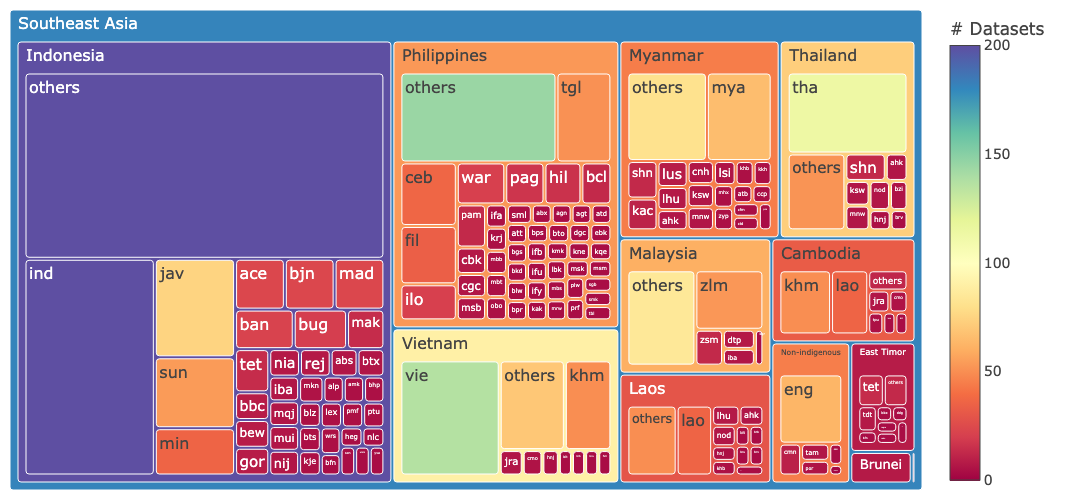

In [250]:
fig = px.treemap(pdf, path=[px.Constant("Southeast Asia"), 'Region', 'ISO code'], values='# Datasets',
                  color='# Datasets', range_color=[0, 200],
                  color_continuous_scale='Spectral', color_continuous_midpoint=100)
fig.update_traces(root_color="#ffffff", textfont=dict(size=16), marker=dict(cornerradius=3))
fig.update_layout(
    template='none',
    width=1000,
    height=500,
    margin=dict(l=10, r=10, t=10, b=10),
    font_size = 14,
    # uniformtext=dict(minsize=8, mode='show'),
    showlegend = True,
)
fig.show()

In [252]:
all_dset_df = pd.read_csv('./utils/all_datasets.csv')
all_dset_df.tail()

,No,Dataset name,Exists in Subset List?,Subset(s),Unnamed: 4,Dataset description,Dataset URL,HuggingFace URL,Dataset language(s),Dataset collection region,...,Edit Link,Submission Date,Last Update Date,Unnamed: 50,Approval Status,Reviewer,Notes,Obtained points,Dataloader name,GitHub Issue URL
465,466,XQuAD,XQuAD,xquad.th\nxquad.vi,NaN,XQuAD (Cross-lingual Question Answering Datase...,https://github.com/google-deepmind/xquad,https://huggingface.co/datasets/xquad,tha\r\nvie,NaN,...,https://www.jotform.com/edit/5741921855254967213,2023-10-27 13:03:05,2023-10-29 19:20:57,NaN,Approved,samuel.cahyawijaya@gmail.com,NaN,2.0,xquad,https://github.com/SEACrowd/seacrowd-datahub/i...
466,467,XQuAD-R,NO!!!,NaN,NaN,XQuAD-R is a retrieval version of the XQuAD da...,https://github.com/google-research-datasets/la...,NaN,tha\r\nvie,NaN,...,https://www.jotform.com/edit/5877329672004338040,2024-04-01 06:22:47,2024-04-01 15:29:57,NaN,Approved,rahmad.mahendra@cs.ui.ac.id,update from original submission:\ndataset anno...,2.0,xquadr,https://github.com/SEACrowd/seacrowd-datahub/i...
467,468,xSID,xSID,English\nIndonesian,NaN,"We introduce XSID, a new benchmark for cross-l...",https://bitbucket.org/robvanderg/xsid/src/master/,NaN,ind\neng,NaN,...,NaN,NaN,NaN,NaN,NusaCrowd carry-over,NaN,Cannot find the speech data,NaN,xsid,NaN
468,469,XStoryCloze,XStoryCloze,id\nmy,NaN,XStoryCloze consists of the professionally tra...,https://huggingface.co/datasets/juletxara/xsto...,https://huggingface.co/datasets/juletxara/xsto...,ind\r\nmya,NaN,...,https://www.jotform.com/edit/5758787725592903029,2023-11-16 01:32:52,2023-11-19 13:19:25,NaN,Approved,samuel.cahyawijaya@gmail.com,+1 from Burmese,3.0,xstorycloze,https://github.com/SEACrowd/seacrowd-datahub/i...
469,470,Yunshan-Cup-2020 Lao POS,Yunshan-Cup-2020 Lao POS,lao,NaN,"Lao POS dataset containing 11,000 sentences wa...",https://github.com/GKLMIP/Yunshan-Cup-2020,NaN,lao,Laos,...,https://www.jotform.com/edit/5758634875409132496,2023-11-15 21:18:07,2023-11-19 13:54:59,NaN,Approved,holy@aisingapore.org,NaN,3.0,yunshan_cup_2020,https://github.com/SEACrowd/seacrowd-datahub/i...


In [253]:
def get_index_from_pair(element_1, element_2, list_1, list_2):
    for i, (x, y) in enumerate(zip(list_1, list_2)):
        if x == element_1 and y == element_2:
            return i
    return -1

In [254]:
TASK_TO_DISPLAY_NAME = {
    "Abstract Meaning Representation": "Abstract Mean.\nRepr.",
    "Abstractive Summarization": "Abs.\nSummariz.",
    "Abusive Language Detection": "Abusive Lang.\nDet.",
    "Aspect Based Sentiment Analysis": "ABSA",
    "Automatic Essay Scoring": "Essay\nScoring",
    "Automatic Speech Recognition": "ASR",
    "Chatbot": "Chatbot",
    "Clickbait Detection": "Clickbait\nDet.",
    "Code-switching Identification": "Code-switch.\nID",
    "Commonsense Reasoning": "Commonsense",
    "Constituency Parsing": "Const.\nParsing",
    "Coreference Resolution": "Coref.\nRes.",
    "Cross-lingual Abstractive Summarization": "X-Abs.\nSummariz.",
    "Cross-Lingual Abstractive Summarization": "X-Abs.\nSummariz.",
    "Dependency Parsing": "Dep.\nParsing",
    "Dialect Identification": "Dialect\nID",
    "Dialogue System": "Dialogue\nSystem",
    "Emotion Classification": "Emo\nCls.",
    "Emotion Recognition": "Emo\nCls.",
    "Entity Linking": "Entity\nLink.",
    "Fact Checking": "Fact\nCheck.",
    "Goal-oriented Generation": "Goal-orient.\nGen.",
    "Grammatical Error Correction": "Error\nCorrect.",
    "Hate Speech Detection": "Hate\nSpeech\nDet.",
    "Hoax Detection": "Hoax\nDet.",
    "Image-to-Text Generation": "Img.\nCap.",
    "Instruction Tuning": "Instruction\nTuning",
    "Intent Classification": "Intent\nCls.",
    "Keyword Extraction": "Keyword\nExtract.",
    "Knowledge Base": "KB",
    "Language Identification": "LID",
    "Language Modeling": "Lang.\nModel.",
    "Legal Classification": "Legal Cls.",
    "Lexical Normalization": "Lexical Norm.",
    "Machine Translation": "MT",
    "Morphological Inflections": "Morph.\nInflect.",
    "Multimodal Summarization": "MM.\nSummariz.",
    "Named Entity Recognition": "NER",
    "Named Entiy Recognition": "NER",
    "Natural Language Inference": "NLI",
    "Next Tweet Prediction": "Next Tweet\nPred.",
    "Optical Character Recognition": "OCR",
    "Paraphrasing": "Paraphrasing",
    "Poem Generation": "Poem Gen.",
    "POS Tagging": "POS Tag.",
    "Question Answering": "QA",
    "Question Generation": "QG",
    "Readibility Assessment": "Read.\nAssess.",
    "Relation Extraction": "Relation\nExtract.",
    "Rhetoric Mode": "Rhetoric\nMode Cls.",
    "Semantic Role Labeling": "SRL",
    "Semantic Textual Similarity": "Sem.\nText Sim.",
    "Sentiment Analysis": "Senti.\nAnalysis",
    "Short Answer Grading": "Answer Grading",
    "Sign Language Recognition": "Sign Lang.\nRecog.",
    "Slot Filling": "Slot Filling",
    "Speech Emotion Recognition": "SER",
    "Speech-to-Speech Translation": "S2S\nTrans.",
    "Speech-to-Text Translation": "S2T\nTrans.",
    "Spoken Language Identification": "S-LID",
    "Spoken Language Understanding": "SLU",
    "Stance Detection": "Stance\nDet.",
    "Statement Tagging": "Statement Tag.",
    "Style Transfer": "Style Transfer",
    "Summarization": "Summari-\nzation",
    "Text Classification": "Text Cls.",
    "Text Retrieval": "Text Retriev.",
    "Text-to-Image Generation": "Text-to-image Gen.",
    "Text-To-Speech Synthesis": "TTS",
    "Text-to-SQL": "Text-to-SQL",
    "Token-level language identification": "Token LID",
    "Topic Classification": "Topic Cls.",
    "Topic Modeling": "Topic Modeling",
    "Toxic Wordlist": "Wordlist",
    "Tweet Ordering": "Tweet Order.",
    "Video Captioning": "Video Cap.",
    "Video-to-Text Retrieval": "Video-to-text Retriev.",
    "Visual Question Answering": "VQA",
    "Visual Storytelling": "Visual Storytell.",
    "VL Modeling": "VL Modeling",
    "Word Analogy": "Word Analogy",
    "Word lists": "Wordlist",
    "Word Sense Disambiguation": "WSD",
    "Word-level Translation": "Word Translation",
    "Wordnet": "Wordnet",
}

In [255]:
region_tasks_df = {'region': [], 'task': [], 'n_dataset': []}

for i in range(len(all_dset_df)):
    langs = all_dset_df['Dataset language(s)'][i].split("\n")
    langs = [lang.strip() for lang in langs]
    tasks = all_dset_df['Dataset task(s)'][i].split("\n")

    regions = list(set(df[(df['ISO code'].isin(langs))]['Region'].tolist()))
    tasks = [TASK_TO_DISPLAY_NAME[task.strip()] for task in tasks]
    tasks = list(set(tasks))
    
    for region in regions:
        for task in tasks:
            task = task.strip()
            index = get_index_from_pair(region, task, region_tasks_df['region'], region_tasks_df['task'])
            if index != -1:
                region_tasks_df['n_dataset'][index] += 1
            else:
                region_tasks_df['task'].append(task)
                region_tasks_df['n_dataset'].append(1)
                region_tasks_df['region'].append(region)

region_tasks_df = pd.DataFrame.from_dict(region_tasks_df)
region_tasks_df = region_tasks_df.replace(r'\s+', '\n', regex=True)
region_tasks_df.tail(10)

,region,task,n_dataset
354,Malaysia,Text-to-image\nGen.,1
355,Vietnam,Text-to-image\nGen.,1
356,Thailand,Text-to-image\nGen.,1
357,Myanmar,Text-to-image\nGen.,1
358,Indonesia,Fact\nCheck.,1
359,Thailand,Commonsense,1
360,Thailand,NLI,1
361,Non-indigenous,SLU,1
362,Indonesia,SLU,1
363,Myanmar,Commonsense,1


In [256]:
others_cutoff_point = 3
pdf = region_tasks_df[region_tasks_df["n_dataset"] > others_cutoff_point]

others_df = region_tasks_df[region_tasks_df["n_dataset"] <= others_cutoff_point]
others_df = others_df.groupby(["region"]).sum(["n_dataset"]).reset_index()
if "task" not in others_df.columns:
    others_df["task"] = ["Others" for i in range(len(others_df))]

pdf = pd.concat([pdf, others_df]).reset_index()
pdf = pdf.loc[:, ~pdf.columns.str.contains('^index')]
pdf.head(10)

,region,task,n_dataset
0,Indonesia,QA,14
1,Thailand,ASR,11
2,Thailand,OCR,5
3,Philippines,ASR,6
4,Vietnam,ASR,13
5,Indonesia,ASR,28
6,Indonesia,Lang.\nModel.,32
7,Indonesia,WSD,5
8,Malaysia,MT,17
9,Vietnam,MT,22


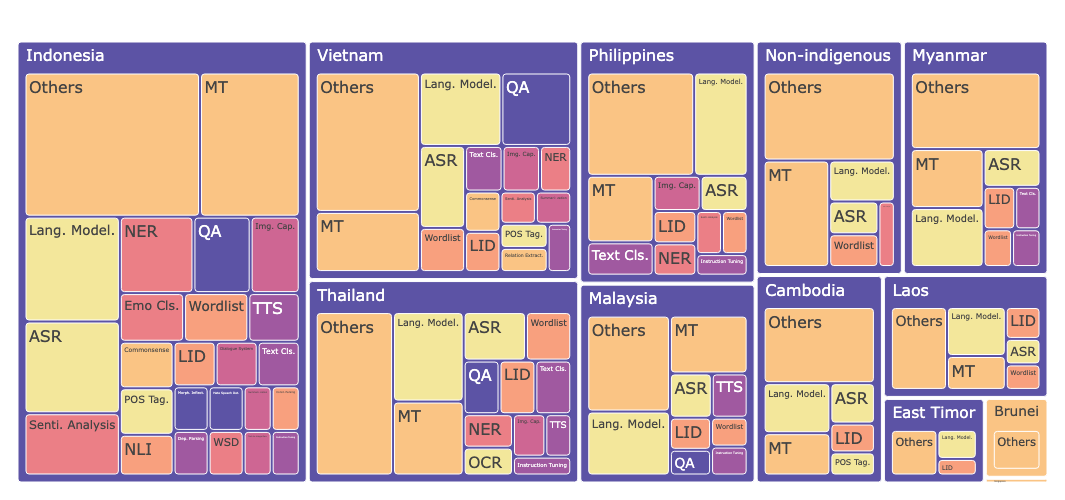

In [362]:
fig = px.treemap(pdf, path=['region', 'task'], values='n_dataset',
                  color='task', labels='task',
                  # range_color=[0, 40],
                  # color_continuous_scale='Viridis',
                  color_discrete_sequence=px.colors.sequential.Sunset[:],
                  # color_discrete_sequence=px.colors.sequential.Viridis[1:],
                )

fig.update_traces(root_color="#ffffff", textfont=dict(size=16), marker=dict(cornerradius=3))
fig.update_layout(
    template='none',
    width=1000,
    height=500,
    margin=dict(l=10, r=10, t=10, b=10),
    # uniformtext=dict(minsize=8, mode='show'),
    showlegend = True,
)
fig.show()